In [2]:
"""coil scan analysis"""

from matplotlib import pyplot as plt
import csv
import numpy as np

In [126]:
datafile = "C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\20230506_163411_coil_scan.csv"
has_header = True
with open(datafile, 'r', newline='') as f:
    reader = csv.reader(f)
    if has_header:
        header = reader.__next__()
    data = [row for row in reader]#[:5]
    f.close()

data = np.array(data,float).transpose()
# print(data)
rows,cols = data.shape

In [127]:
counts = data[0]
pd_data = data[-1] # the cooling laser power monitor
coil_data = data[1:-1]#[:12800] # just as a check. should make two figures

zbottom_data, ztop_data, xdata, ydata = coil_data

zbottom_steps = len(list(set(zbottom_data)))
ztop_steps = len(list(set(zbottom_data)))
xsteps = len(list(set(xdata)))
ysteps = len(list(set(ydata)))

In [67]:
nrows = 4
ncols = 4
assert zbottom_steps % nrows == 0, "zbottom_steps should be divisible by nrows for the grid of plots"
assert ztop_steps % ncols == 0, "ztop_steps should be divisible by ncols for the grid of plots"

In [161]:
# this plotting procedure assumes that the order of the loops is ztop, zbottom, x, yb

ymin = xmin = 0
xmax = ymax = xsteps

maxcounts = max(counts)
mincounts = min(counts)

for k in range(ztop_steps//ncols):
    for l in range(zbottom_steps//nrows):

        fig, axes = plt.subplots(nrows=nrows,ncols=ncols)

        for col in range(ncols):
            for row in range(nrows):

                ax = axes[row,col]

                ztop_step = k*ncols + col
                zbottom_step = l*nrows + row
                
                # the step where we start counting from to get the counts at x and y steps
                # for a given ztop,zbottom
                step0 = ysteps*xsteps*zbottom_steps*ztop_step + zbottom_step*ysteps*xsteps
                                
                imdata = counts[step0:step0+xsteps*ysteps].reshape((xsteps,ysteps))
                
                im = ax.imshow(imdata, extent=[ymin, ymax, xmin, xmax], vmin=mincounts, vmax=maxcounts)
                ax.set_aspect((ymax-ymin)/(xmax-xmin))
                ax.set_title(f"{step0} - {step0+xsteps*ysteps}",fontsize=8)
#                 ax.set_xticks(ax.get_xticks(),fontsize=6)
                if col > 0:
                    ax.set_yticks([])
                if row < 3:
                    ax.set_xticks([])

        fig.tight_layout()
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)

        fig.text(0.4, 0, 'X steps', ha='center', va='center')
        fig.text(-0.0, 0.5, 'Y steps', ha='center', va='center', rotation='vertical')
        fig.dpi = 150
        plt.savefig(datafile[:-4] + '_3D_' + str(k*(1+ncols) + l) + '.png', bbox_inches='tight')
        plt.close()

#     break

In [188]:
# plot the photodiode voltage and counts. produce same number of figures as above

minpd = min(pd_data)
maxpd = max(pd_data)
for i in range(len(counts)//(xsteps*ysteps*ncols*nrows)):
    fig,axes = plt.subplots(nrows=2,ncols=1,sharex=True)
    ax,ax2 = axes
    imin = i*nrows*ncols*xsteps*ysteps
    imax = (i+1)*nrows*ncols*xsteps*ysteps
    ax.plot(counts[imin:imax])
    ax.set_ylim((mincounts,maxcounts))
    ax.set_ylabel("SPCM counts")
    ax2.plot(pd_data[imin:imax])
    ax2.set_ylim((minpd,maxpd))
    ax2.set_ylabel("PD voltage")
    ax.set_title(f"steps i0={imin} to if={imax}")
    ax2.set_xlabel("steps + i0")
    plt.savefig(datafile[:-4] + '_counts_and_pd_' + str(i) + '.png', bbox_inches='tight')
    plt.close()

## tests

In [14]:
i=0
j=0
k=0
l=0
row=0
col=2
i*xsteps + j + k*xsteps*ysteps*col + 

0

In [36]:
i=19
j=19
k=19/4
l=19/4
row=4
col=4
i*xsteps + j + k*xsteps*ysteps*col + l*(i*xsteps + j + k*xsteps*ysteps*col)*row

159980.0

In [31]:
20**4

160000

In [124]:
zbottom_steps//nrows

0

In [64]:
ztop_steps//ncols,zbottom_steps//nrows

(5, 5)

In [160]:
for k in range(ztop_steps//ncols):
    for l in range(zbottom_steps//nrows):
        print(k*(1+ncols) + l, k, l)

0 0 0
1 0 1
2 0 2
3 0 3
4 0 4
5 1 0
6 1 1
7 1 2
8 1 3
9 1 4
10 2 0
11 2 1
12 2 2
13 2 3
14 2 4
15 3 0
16 3 1
17 3 2
18 3 3
19 3 4
20 4 0
21 4 1
22 4 2
23 4 3
24 4 4


In [ ]:
for k in range(ztop_steps//ncols):
    for col in range(ncols):
        print(k*ncols+col)

In [83]:
k = l = 4
col = row = 3
ztop_step = k*ncols + col
zbottom_step = l*nrows + row

# the step where we start counting from to get the counts at x and y steps
# for a given ztop,zbottom
step0 = ysteps*xsteps*zbottom_steps*ztop_step + zbottom_step*ysteps*xsteps
print(step0+20**2, 20**4)

159600 160000


In [129]:
k = 0
l = 0
col = 0
row = 0
ztop_step = k*ncols + col
zbottom_step = l*nrows + row

# the step where we start counting from to get the counts at x and y steps
# for a given ztop,zbottom
step0 = ysteps*xsteps*zbottom_steps*ztop_step + zbottom_step*ysteps*xsteps
print(step0)

0


In [130]:
zbottom_steps

20

Text(0, 0.5, 'y')

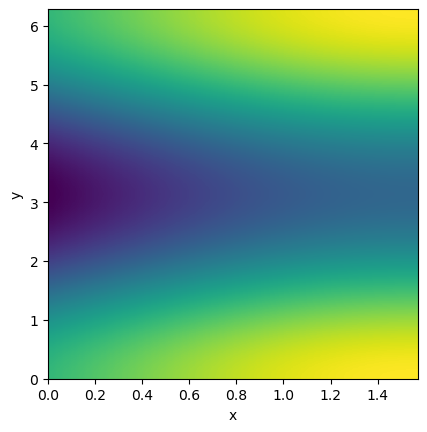

In [98]:
nx = 200
ny = 50
xpts = np.linspace(0,2*np.pi,nx)
ypts = np.linspace(0,np.pi/2,ny)
data = np.zeros(nx*ny)
step = 0
for x in xpts:
    for y in ypts:
        data[step] = np.cos(x)+np.sin(y)
        step += 1
fig,ax = plt.subplots()
ax.imshow(data.reshape((nx,ny)),extent=[ypts[0],ypts[-1],xpts[0],xpts[-1]])
ax.set_aspect((ypts[-1]-ypts[0])/(xpts[-1]-xpts[0]))
ax.set_xlabel("x")
ax.set_ylabel("y")